# Using Features to Predict Production

Within this file we will be using our selected features to then see how well we can predict production off of them.

The way we will do this is by first splitting off the information into a training set and a testing set then using LASSO to see how accurately the model can predict the production off of the testing set.

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns

from pandas import read_excel
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Reading in all the information that we need

all_data = pd.read_excel("main_file_final.xlsx")
all_data.set_index("Field name")

data = pd.read_excel("features_with_data.xlsx")
data = data.set_index("Field name")

oil_prod = all_data["Orig. recoverable oil \n[mill Sm3]"]
gas_prod = all_data["Orig. recoverable gas \n[bill Sm3]"]

First we need to create a dataframe that will contain all the data for the selected features to predict oil production along with the total oil production values. Next we need another one containing the selected features to predict gas production along with the total gas production values. Once we do that we can split it into the training and testing sets.

In [3]:
selected_oil_features = [
    "Orig. inplace oil \n[mill Sm3]",
    "Orig. inplace ass. gas \n[bill Sm3]",
    "Orig. recoverable oil eq. \n[mill Sm3 o.e]",
    "Dev Duration",
    "Orig. recoverable NGL \n[mill tonn]"
]

selected_gas_features = [
    "Orig. recoverable oil eq. \n[mill Sm3 o.e]",
    "Remaining  oil eq. \n[mill Sm3 o.e]",
    "Remaining gas \n[bill Sm3]",
    "Remaining NGL \n[mill tonn]",
    "Orig. inplace free gas \n[bill Sm3]"
]

In [4]:
selected_oil_data = pd.DataFrame(columns = selected_oil_features)
selected_gas_data = pd.DataFrame(columns = selected_gas_features)

In [5]:
for col in selected_oil_data.columns:
    selected_oil_data[col] = data[col]
    
for col in selected_gas_data.columns:
    selected_gas_data[col] = data[col]

In [6]:
selected_oil_data["Oil Production"] = 0.0
selected_gas_data["Gas Production"] = 0.0

counter = 0
for index in selected_oil_data.index:
    selected_oil_data.at[index, "Oil Production"] = float(oil_prod[counter])
    selected_gas_data.at[index, "Gas Production"] = float(gas_prod[counter])
    counter += 1

In [7]:
selected_oil_data

,Orig. inplace oil \n[mill Sm3],Orig. inplace ass. gas \n[bill Sm3],Orig. recoverable oil eq. \n[mill Sm3 o.e],Dev Duration,Orig. recoverable NGL \n[mill tonn],Oil Production
Field name,,,,,,
ALBUSKJELL,56,64,24.761,96,0.99,7.35
ALVE,3,1,14.149,90,1.41,2.39
ALVHEIM,109,10,61.850,160,0.00,51.79
ATLA,0,0,1.800,0,0.00,0.40
BALDER,263,14,110.120,239,0.00,106.87
...,...,...,...,...,...,...
YTTERGRYTA,0,0,3.289,0,0.41,0.29
Ãƒâ€ RFUGL,13,0,50.825,114,4.15,5.90
ÃƒËœST FRIGG,0,0,9.290,8,0.00,0.00


In [8]:
selected_gas_data

,Orig. recoverable oil eq. \n[mill Sm3 o.e],Remaining oil eq. \n[mill Sm3 o.e],Remaining gas \n[bill Sm3],Remaining NGL \n[mill tonn],Orig. inplace free gas \n[bill Sm3],Gas Production
Field name,,,,,,
ALBUSKJELL,24.761,0.000,0.00,0.00,0.00,15.53
ALVE,14.149,2.972,2.10,0.28,13.50,9.08
ALVHEIM,61.850,13.510,4.20,0.00,11.69,10.06
ATLA,1.800,0.000,0.00,0.00,1.88,1.40
BALDER,110.120,37.420,1.24,0.00,0.00,3.25
...,...,...,...,...,...,...
YTTERGRYTA,3.289,0.000,0.00,0.00,7.39,2.22
Ãƒâ€ RFUGL,50.825,42.948,31.61,3.52,63.00,37.04
ÃƒËœST FRIGG,9.290,0.000,0.00,0.00,21.37,9.22


In [9]:
# Splitting the oil and gas tables into a training set and a testing set
selected_oil_data_copy = selected_oil_data.copy()
oil_train_set = selected_oil_data_copy.sample(frac=0.7, random_state = 0)
oil_test_set = selected_oil_data_copy.drop(oil_train_set.index)

selected_gas_data_copy = selected_gas_data.copy()
gas_train_set = selected_gas_data_copy.sample(frac=0.7, random_state = 0)
gas_test_set = selected_gas_data_copy.drop(gas_train_set.index)

In [10]:
# Splitting the feature data from the production data from
# the training sets and the testing sets.

oil_train_data = oil_train_set.drop(["Oil Production"], axis = 1)
oil_train_prod = oil_train_set.drop(oil_train_data.columns, axis=1)
oil_test_data = oil_test_set.drop(["Oil Production"], axis = 1)
oil_test_prod = oil_test_set.drop(oil_test_data.columns, axis=1)

gas_train_data = gas_train_set.drop(["Gas Production"], axis = 1)
gas_train_prod = gas_train_set.drop(gas_train_data.columns, axis = 1)
gas_test_data = gas_test_set.drop(["Gas Production"], axis = 1)
gas_test_prod = gas_test_set.drop(gas_test_data.columns, axis = 1)

In [11]:
# Here we create the lasso model fit with the training data
# for oil production

lasso = linear_model.Lasso(max_iter = 500, warm_start = False)

lasso.fit(oil_train_data, oil_train_prod)

# Here we want to take the predicted oil values to be used
# later when we graph how accurately our model was to the
# actual oil values.
oil_pred_prod = lasso.predict(oil_test_data)

# Recording the score for predicting oil.
score_oil = lasso.score(oil_test_data, oil_test_prod)

In [12]:
# Here we create the lasso model fit with the training data
# for gas production
lasso = linear_model.Lasso(max_iter = 500, warm_start = False)

lasso.fit(gas_train_data, gas_train_prod)

# Here we want to take the predicted gas values to be used
# later when we graph how accurately our model was to the
# actual gas values.
gas_pred_prod = lasso.predict(gas_test_data)

# Recording the score for predicting gas.
score_gas = lasso.score(gas_test_data, gas_test_prod)

In [13]:
score_oil

0.9300709670182348

In [14]:
score_gas

0.9410798156704958

We were interested in printing out how accurately our models would predict oil and gas production. The next steps are taken to be able to print out how our model did versus the actual production values.

In [15]:
oil_printing = pd.DataFrame(columns = ["Field",
                                       "Production",
                                       "Type"
                                      ])

gas_printing = pd.DataFrame(columns = ["Field",
                                       "Production",
                                       "Type"
                                      ])

In [16]:
counter = 0
array_counter = 0
for index in oil_test_prod.index:
    oil_printing.at[counter, "Field"] = index
    oil_printing.at[counter, "Production"] = oil_test_prod.at[index, "Oil Production"]
    oil_printing.at[counter, "Type"] = "Actual"
    counter+=1
    oil_printing.at[counter, "Field"] = index
    oil_printing.at[counter, "Production"] = oil_pred_prod[array_counter]
    oil_printing.at[counter, "Type"] = "Predicted"
    array_counter+=1
    counter+=1

In [17]:
counter = 0
array_counter = 0
for index in gas_test_prod.index:
    gas_printing.at[counter, "Field"] = index
    gas_printing.at[counter, "Production"] = gas_test_prod.at[index,"Gas Production"]
    gas_printing.at[counter, "Type"] = "Actual"
    counter+=1
    gas_printing.at[counter, "Field"] = index
    gas_printing.at[counter, "Production"] = gas_pred_prod[array_counter]
    gas_printing.at[counter, "Type"] = "Predicted"
    array_counter+=1
    counter+=1

In [18]:
oil_printing

,Field,Production,Type
0,BYRDING,1.01,Actual
1,BYRDING,3.22122,Predicted
2,DRAUGEN,151.17,Actual
3,DRAUGEN,109.504,Predicted
4,ENOCH,0.38,Actual
...,...,...,...
69,YTTERGRYTA,0.877042,Predicted
70,Ãƒâ€ RFUGL,5.9,Actual
71,Ãƒâ€ RFUGL,12.9076,Predicted
72,Ãƒâ€¦SGARD,105.85,Actual


In [19]:
gas_printing

,Field,Production,Type
0,BYRDING,0.79,Actual
1,BYRDING,-1.31565,Predicted
2,DRAUGEN,1.68,Actual
3,DRAUGEN,22.571,Predicted
4,ENOCH,0,Actual
...,...,...,...
69,YTTERGRYTA,2.08237,Predicted
70,Ãƒâ€ RFUGL,37.04,Actual
71,Ãƒâ€ RFUGL,41.406,Predicted
72,Ãƒâ€¦SGARD,222.14,Actual


Text(0.5, 1.0, 'Oil Production vs Oil production Prediction')

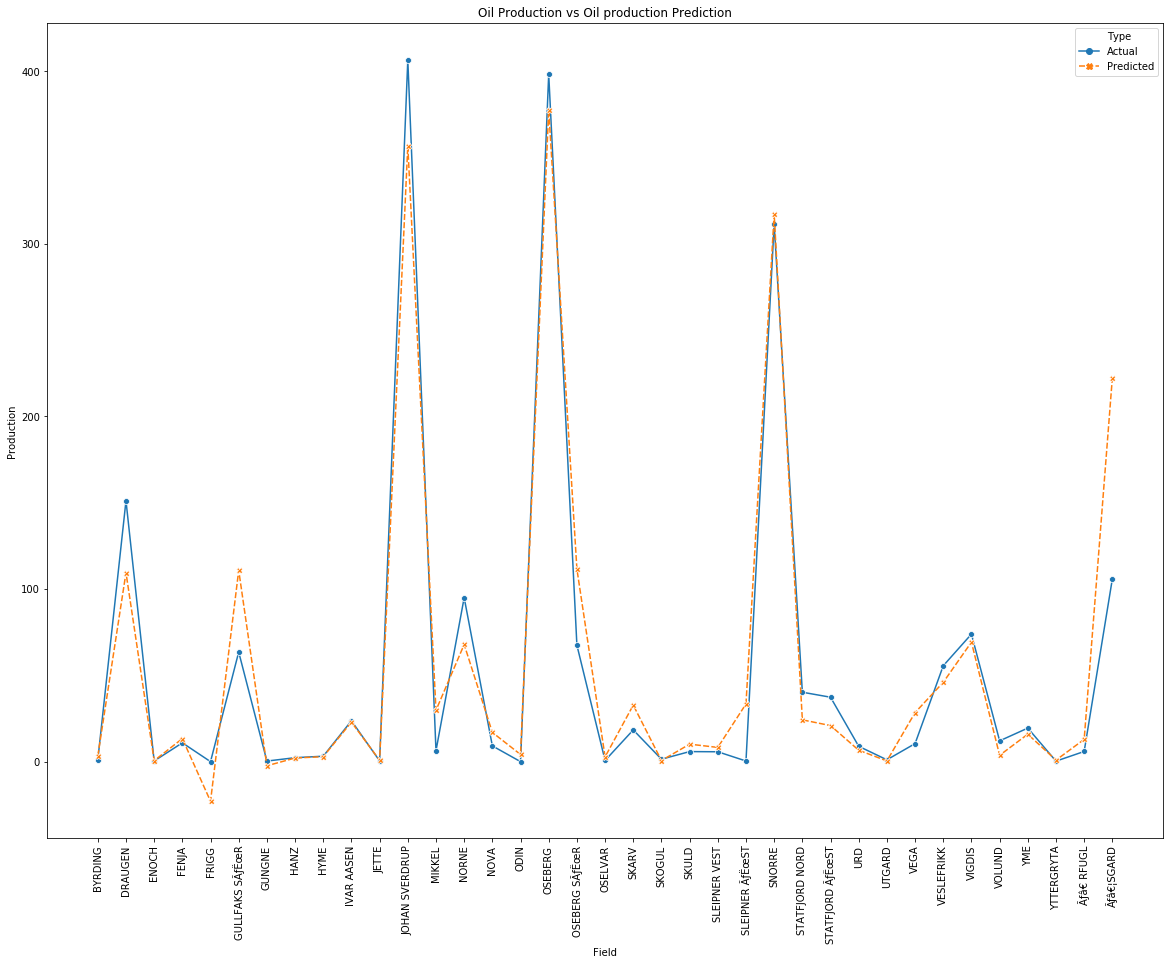

In [20]:
plt.subplots(figsize = (20,15))
plt.xticks(rotation=90)
ax = sns.lineplot(x="Field", 
                  y="Production",
                  hue="Type",
                  style="Type",
                  estimator=None,
                  markers=True,
                  data=oil_printing)
ax.set_title("Oil Production vs Oil production Prediction")

Text(0.5, 1.0, 'Gas Production vs Gas production Prediction')

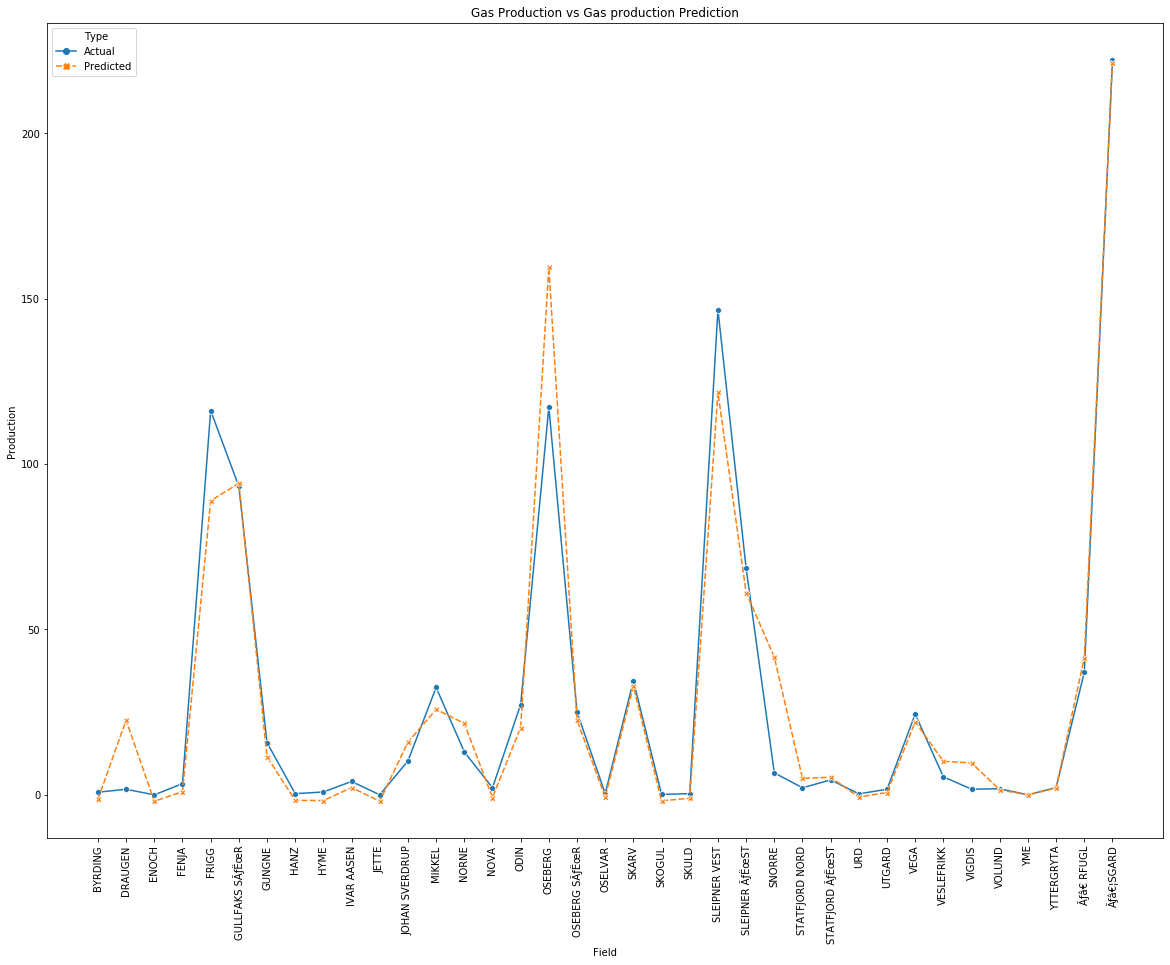

In [21]:
plt.subplots(figsize = (20,15))
plt.xticks(rotation=90)
ax = sns.lineplot(x="Field", 
                  y="Production",
                  hue="Type",
                  style="Type",
                  estimator=None,
                  markers=True,
                  data=gas_printing)
ax.set_title("Gas Production vs Gas production Prediction")